## 이중차분법을 통해 기상데이터와 코로나 데이터가 수요량과 어떠한 관계가 있는지를 파악하고자 한다.

In [1]:
# load package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import plotly_express as px

In [2]:
# directory check
import os
os.getcwd()


'/Users/kyeongtae/Library/CloudStorage/Dropbox/GitHub/coding/자료분석 및 실험/code/model'

In [3]:
# 기상 data load
weather_1 = pd.read_csv('../../data/weather/peak_2018.csv')
weather_2 = pd.read_csv('../../data/weather/peak_2019.csv')
weather_3 = pd.read_csv('../../data/weather/peak_2020.csv')

test_weather = pd.read_csv('../../data/weather/peak_2021.csv')

# 따릉이 수요량 data load
demand = pd.read_csv('../../data/traindata.csv')
demand

,date,광진구,동대문구,성동구,중랑구
0,2018-01-01,0.592,0.368,0.580,0.162
1,2018-01-02,0.840,0.614,1.034,0.260
2,2018-01-03,0.828,0.576,0.952,0.288
3,2018-01-04,0.792,0.542,0.914,0.292
4,2018-01-05,0.818,0.602,0.994,0.308
...,...,...,...,...,...
1091,2020-12-27,3.528,2.604,3.258,2.038
1092,2020-12-28,4.542,3.588,4.506,2.480
1093,2020-12-29,3.694,3.054,3.222,2.118
1094,2020-12-30,2.366,1.812,2.012,1.174


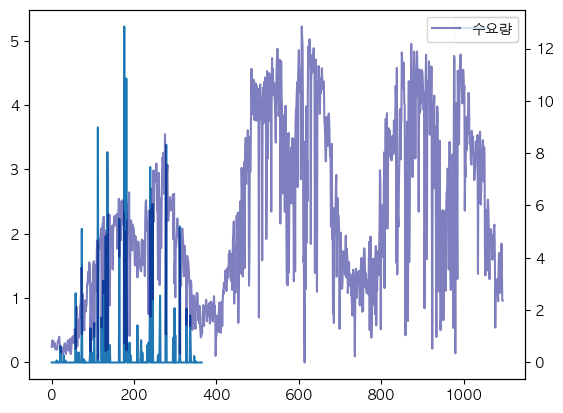

In [4]:
plt.rc('font', family = 'AppleGothic')
weather_1['rain'].plot(label = '강수량')
plt.legend('강수량')
plt.gca().twinx()
demand['광진구'].plot(colormap='jet', alpha=0.5, label = '수요량')
plt.legend()
plt.show()

In [5]:
# 2020년 데이터로 우선적으로 진행
df = pd.read_csv('../../data/df_with_infected.csv', index_col = 0)
df

,date,광진구,동대문구,성동구,중랑구,temp,rain,humid,snow,sum
0,2020-01-20,3.156,2.142,2.852,1.394,2.438462,0.000000,45.461538,0.0,0
1,2020-01-21,3.420,2.288,2.996,1.620,0.330769,0.000000,33.769231,0.0,0
2,2020-01-22,3.780,2.424,3.074,1.626,3.838462,0.000000,31.230769,0.0,0
3,2020-01-23,3.998,2.424,3.172,1.800,5.538462,0.000000,43.307692,0.0,0
4,2020-01-24,2.388,1.392,1.864,1.288,3.653846,0.000000,59.846154,0.0,0
...,...,...,...,...,...,...,...,...,...,...
342,2020-12-27,3.528,2.604,3.258,2.038,6.484615,0.000000,61.384615,0.0,348
343,2020-12-28,4.542,3.588,4.506,2.480,7.846154,0.000000,70.538462,0.0,290
344,2020-12-29,3.694,3.054,3.222,2.118,1.807692,0.015385,76.615385,0.0,447
345,2020-12-30,2.366,1.812,2.012,1.174,-10.538462,0.000000,52.461538,0.0,367


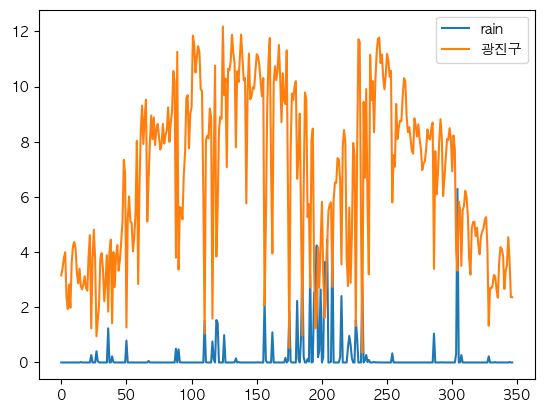

[[ 1.         -0.35388834]
 [-0.35388834  1.        ]]


In [6]:
df[['rain', '광진구']].plot()
plt.show()

print(np.corrcoef(df['rain'], df['광진구']))

In [7]:
import statsmodels.api as sm

df

,date,광진구,동대문구,성동구,중랑구,temp,rain,humid,snow,sum
0,2020-01-20,3.156,2.142,2.852,1.394,2.438462,0.000000,45.461538,0.0,0
1,2020-01-21,3.420,2.288,2.996,1.620,0.330769,0.000000,33.769231,0.0,0
2,2020-01-22,3.780,2.424,3.074,1.626,3.838462,0.000000,31.230769,0.0,0
3,2020-01-23,3.998,2.424,3.172,1.800,5.538462,0.000000,43.307692,0.0,0
4,2020-01-24,2.388,1.392,1.864,1.288,3.653846,0.000000,59.846154,0.0,0
...,...,...,...,...,...,...,...,...,...,...
342,2020-12-27,3.528,2.604,3.258,2.038,6.484615,0.000000,61.384615,0.0,348
343,2020-12-28,4.542,3.588,4.506,2.480,7.846154,0.000000,70.538462,0.0,290
344,2020-12-29,3.694,3.054,3.222,2.118,1.807692,0.015385,76.615385,0.0,447
345,2020-12-30,2.366,1.812,2.012,1.174,-10.538462,0.000000,52.461538,0.0,367


In [8]:
df.date = pd.to_datetime(df.date)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 0 to 346
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    347 non-null    datetime64[ns]
 1   광진구     347 non-null    float64       
 2   동대문구    347 non-null    float64       
 3   성동구     347 non-null    float64       
 4   중랑구     347 non-null    float64       
 5   temp    347 non-null    float64       
 6   rain    347 non-null    float64       
 7   humid   347 non-null    float64       
 8   snow    347 non-null    float64       
 9   sum     347 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 29.8 KB


In [9]:
df_58 = df.query('date >= "2020-05-01" & date <= "2020-08-31"')
df_58


,date,광진구,동대문구,성동구,중랑구,temp,rain,humid,snow,sum
102,2020-05-01,11.530,6.216,9.376,5.392,21.576923,0.000000,67.461538,0.0,0
103,2020-05-02,10.510,5.424,8.616,5.068,21.230769,0.000000,77.076923,0.0,0
104,2020-05-03,11.066,5.416,9.142,4.858,23.038462,0.000000,63.923077,0.0,0
105,2020-05-04,11.466,5.876,9.510,5.284,22.623077,0.000000,58.692308,0.0,0
106,2020-05-05,11.260,5.546,9.314,5.286,17.361538,0.000000,65.923077,0.0,0
...,...,...,...,...,...,...,...,...,...,...
220,2020-08-27,2.770,2.374,2.602,1.932,27.084615,0.546154,84.692308,0.0,148
221,2020-08-28,5.614,4.892,4.928,3.902,27.984615,0.961538,86.384615,0.0,137
222,2020-08-29,2.886,2.668,2.582,2.194,27.369231,0.653846,87.307692,0.0,121
223,2020-08-30,4.618,3.254,4.390,2.276,27.815385,0.153846,86.846154,0.0,110


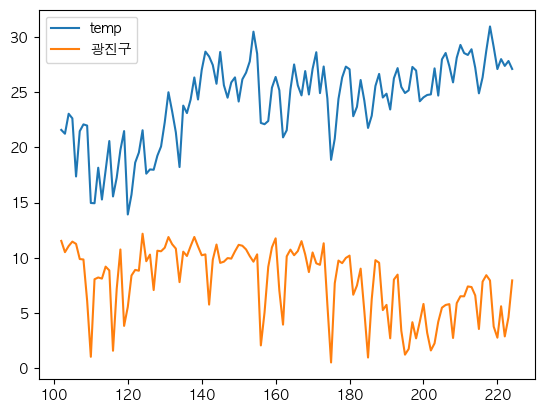

In [10]:
df_58[['temp', '광진구']].plot()
plt.show()

/var/folders/4s/g6pfmmx12cld6l67jdrvydmr0000gn/T/ipykernel_14187/1979400202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_58.temp = df_58.temp - sub_mean - 5


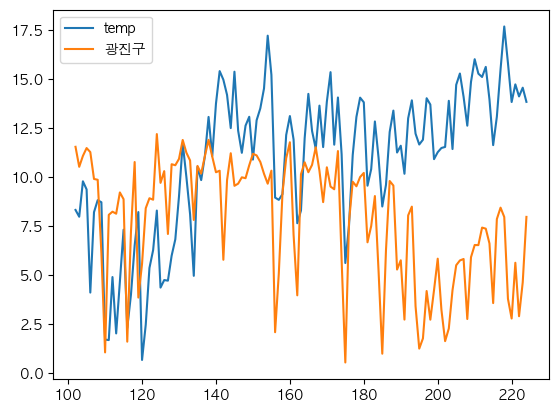

In [11]:
sub_mean = np.mean(df.temp - df.광진구) # 온도가 강수량이 없었을때 이상적인 수요량이라고 할때

df_58.temp = df_58.temp - sub_mean - 5

df_58[['temp', '광진구']].plot()
plt.show() # 180일 이후에 보이는 차이가 강수량이 없었을때의 수요량과의 차이라고 할 수 있을까를 검정하고 싶음

In [12]:
# make dataset
rain_b = np.where(df_58.rain > 0.05, 1, 0)
date_b = np.where(df_58.date > '2020-06-30', 1, 0)

df_58.reset_index(drop = True, inplace = True)

In [13]:
add_data = pd.DataFrame({'rain_b': rain_b, 'date_b': date_b})
df_58 = pd.concat([df_58, add_data], axis = 1)

In [14]:
df_58.mul = df_58.rain_b * df_58.date_b

In [15]:
df_58.reset_index(inplace = True)
df_58

,index,date,광진구,동대문구,성동구,중랑구,temp,rain,humid,snow,sum,rain_b,date_b
0,0,2020-05-01,11.530,6.216,9.376,5.392,8.308341,0.000000,67.461538,0.0,0,0,0
1,1,2020-05-02,10.510,5.424,8.616,5.068,7.962188,0.000000,77.076923,0.0,0,0,0
2,2,2020-05-03,11.066,5.416,9.142,4.858,9.769880,0.000000,63.923077,0.0,0,0,0
3,3,2020-05-04,11.466,5.876,9.510,5.284,9.354495,0.000000,58.692308,0.0,0,0,0
4,4,2020-05-05,11.260,5.546,9.314,5.286,4.092957,0.000000,65.923077,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,118,2020-08-27,2.770,2.374,2.602,1.932,13.816034,0.546154,84.692308,0.0,148,1,1
119,119,2020-08-28,5.614,4.892,4.928,3.902,14.716034,0.961538,86.384615,0.0,137,1,1
120,120,2020-08-29,2.886,2.668,2.582,2.194,14.100649,0.653846,87.307692,0.0,121,1,1
121,121,2020-08-30,4.618,3.254,4.390,2.276,14.546803,0.153846,86.846154,0.0,110,1,1


In [16]:
df_58['mul'] = df_58.rain_b * df_58.date_b

In [19]:
result = sm.OLS.from_formula('광진구 ~  rain_b + date_b + mul  ', data = df_58).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    광진구   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     68.89
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           6.78e-26
Time:                        15:29:13   Log-Likelihood:                -251.30
No. Observations:                 123   AIC:                             510.6
Df Residuals:                     119   BIC:                             521.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0088      0.266     37.664      0.000       9.483      10.535
rain_b        -5.2306      0.656     -7.969      0.000      -6.530      -3.931
date_b        -1.6152      0.417     -3.878      0.000      -2.440      -0.790
mul            0.8276      0.817      1.013      0.313      -0.790       2.445
==============================================================================
Omnibus:                        0.306   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.210
Skew:                          -0.101   Prob(JB):                        0.900
Kurtosis:                       2.990   Cond. No.                         7.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,date,광진구,동대문구,성동구,중랑구,temp,rain,humid,snow,sum
0,2020-01-20,3.156,2.142,2.852,1.394,2.438462,0.000000,45.461538,0.0,0
1,2020-01-21,3.420,2.288,2.996,1.620,0.330769,0.000000,33.769231,0.0,0
2,2020-01-22,3.780,2.424,3.074,1.626,3.838462,0.000000,31.230769,0.0,0
3,2020-01-23,3.998,2.424,3.172,1.800,5.538462,0.000000,43.307692,0.0,0
4,2020-01-24,2.388,1.392,1.864,1.288,3.653846,0.000000,59.846154,0.0,0
...,...,...,...,...,...,...,...,...,...,...
342,2020-12-27,3.528,2.604,3.258,2.038,6.484615,0.000000,61.384615,0.0,348
343,2020-12-28,4.542,3.588,4.506,2.480,7.846154,0.000000,70.538462,0.0,290
344,2020-12-29,3.694,3.054,3.222,2.118,1.807692,0.015385,76.615385,0.0,447
345,2020-12-30,2.366,1.812,2.012,1.174,-10.538462,0.000000,52.461538,0.0,367
